**Importing all the crucial libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook
import seaborn as sns
import imageio
from IPython.display import HTML

In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

In [3]:
np.random.seed(0)

# Vectorization

In [4]:
N = 100
M = 200
a = np.random.randn(N, M)
b = np.random.randn(N, M)
c = np.zeros((N, M))

In [5]:
%%time
for i in range(N):
  for j in range(M):
    c[i,j] = a[i,j] + b[i,j]

CPU times: user 17.9 ms, sys: 0 ns, total: 17.9 ms
Wall time: 18.9 ms


In [6]:
%%time
c = a + b

CPU times: user 337 µs, sys: 0 ns, total: 337 µs
Wall time: 346 µs


In [7]:
%%time
for i in range(N):
  for j in range(M):
    c[i,j] = np.sin(a[i,j])

CPU times: user 42.3 ms, sys: 0 ns, total: 42.3 ms
Wall time: 43.3 ms


In [8]:
%%time
c = np.sin(a)

CPU times: user 1.44 ms, sys: 0 ns, total: 1.44 ms
Wall time: 814 µs


# Multi-class Classification

**Modelling**

In [9]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


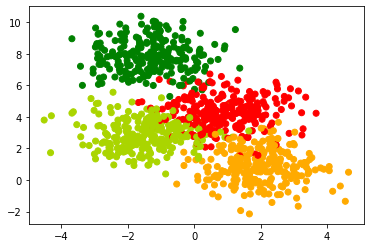

In [10]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


In [12]:
enc = OneHotEncoder()
y_OH_train = enc.fit_transform(np.expand_dims(Y_train, 1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val, 1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


In [13]:
class FFSN_MultiClass:
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self, x):
    #input layer
    self.x1, self.x2 = x

    #hidden layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)

    #output layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b6
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps

    return np.array([self.h3, self.h4, self.h5, self.h6])

  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y

    self.dw5 = (self.h3 - self.y1) * self.h1
    self.dw6 = (self.h3 - self.y1) * self.h2
    self.db3 = (self.h3 - self.y1)

    self.dw7 = (self.h4 - self.y2) * self.h1
    self.dw8 = (self.h4 - self.y2) * self.h2
    self.db4 = (self.h4 - self.y2)

    self.dw9 = (self.h5 - self.y3) * self.h1
    self.dw10 = (self.h5 - self.y3) * self.h2
    self.db5 = (self.h5 - self.y3)

    self.dw11 = (self.h6 - self.y4) * self.h1
    self.dw12 = (self.h6 - self.y4) * self.h2
    self.db6 = (self.h6 - self.y4)

    self.dh1 = (self.h3 - self.y1)*self.w5 + (self.h4 - self.y2)*self.w7 + (self.h5 - self.y3)*self.w9 + (self.h6 - self.y4)*self.w11
    self.dw1 = self.dh1 * self.h1*(1 - self.h1) * self.x1
    self.dw2 = self.dh1 * self.h1*(1 - self.h1) * self.x2
    self.db1 = self.dh1 * self.h1*(1 - self.h1)

    self.dh2 = (self.h3 - self.y1)*self.w6 + (self.h4 - self.y2)*self.w8 + (self.h5 - self.y3)*self.w10 + (self.h6 - self.y4)*self.w12
    self.dw3 = self.dh2 * self.h2*(1 - self.h2) * self.x1
    self.dw4 = self.dh2 * self.h2*(1 - self.h2) * self.x2
    self.db2 = self.dh1 * self.h2*(1 - self.h2)

  def fit(self, X, Y, epochs=100, learning_rate=1, initialise=True, display_loss=False):

    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total=epochs, unit = "epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6 = [0]*18
      for x,y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        db6 += self.db6

      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      self.b6 -= learning_rate * db6 / m

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)

    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X :
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)   

**Evaluation**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


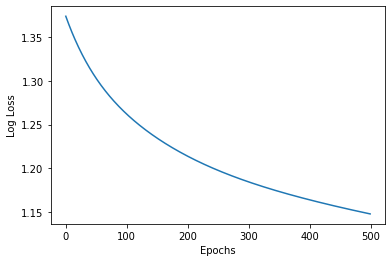

In [14]:
ffn_MultiClass = FFSN_MultiClass()
ffn_MultiClass.fit(X_train, y_OH_train, epochs=500, learning_rate=0.01, display_loss=True)

# Multi-class Classification (Vectorized Version)

In [15]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)
print(W1)
print(W2)

[[0.76103773 0.12167502]
 [0.44386323 0.33367433]]
[[ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]


In [32]:
class FFSN_Vectorised:

  def __init__(self, W1 = W1, W2 = W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def softmax(self, x):
    exp = np.exp(x)
    return exp/np.sum(exp)

  def forward_pass(self, x):
    X = x.reshape(1, -1)     #in vectorization dimensions are really important
    self.A1 = np.matmul(x, self.W1) + self.B1
    self.H1 = self.sigmoid(self.A1)
    self.A2 = np.matmul(self.H1, self.W2) + self.B2
    self.H2 = self.softmax(self.A2)
    return self.H2

  def grad_sigmoid(self, x):
    return x*(1-x)

  def grad(self, x, y):
    self.forward_pass(x)
    x = x.reshape(1, -1)
    y = y.reshape(1, -1)

    self.dA2 = self.H2 - y

    self.dW2 = np.matmul(self.H1.T, self.dA2)
    self.dB2 = self.dA2
    self.dH1 = np.matmul(self.dA2, self.W2.T)
    self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1))

    self.dW1 = np.matmul(x.T, self.dA1)
    self.dB1 = self.dA1

  def fit(self, X, Y, epochs=100, learning_rate=1, initialise=True, display_loss=False):
    
    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total=epochs, unit = "epoch"):
      dW1 = np.zeros((2,2))
      dW2 = np.zeros((2,4))
      dB1 = np.zeros((1,2))
      dB2 = np.zeros((1,4))
      for x, y in zip(X, Y):
        self.grad(x, y)
        dW1 += self.dW1
        dW2 += self.dW2
        dB1 += self.dB1
        dB2 += self.dB2

      m = X.shape[0]
      self.W2 -= learning_rate * (dW2/m)
      self.B2 -= learning_rate * (dB2/m)
      self.W1 -= learning_rate * (dW1/m)
      self.B1 -= learning_rate * (dB1/m)

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)

    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X :
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


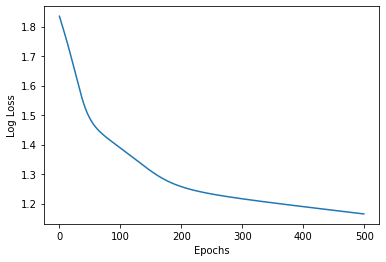

In [33]:
ffn_Vectorized = FFSN_Vectorised()
ffn_Vectorized.fit(X_train,y_OH_train,epochs=500,learning_rate=0.01,display_loss=True)

In [ ]:
#end